# 02 - Convergence Testing

This script demonstrates how to systematically test convergenceof ENCUT and k-points for silicon.   

In [1]:
from ase.build import bulk

from vasp import Vasp

# Try to import matplotlib for plotting
try:
    import matplotlib.pyplot as plt
    HAS_MATPLOTLIB = True
except ImportError:
    HAS_MATPLOTLIB = False
    print("Note: matplotlib not found. Plots will be skipped.")


## Setup


In [2]:
def get_silicon():
    """Create silicon structure."""
    return bulk('Si', 'diamond', a=5.43)


def run_calculation(label, atoms, encut, kpts):
    """Run a single VASP calculation and return energy per atom."""
    calc = Vasp(
        label=label,
        atoms=atoms.copy(),
        xc='PBE',
        encut=encut,
        kpts=kpts,
        ismear=1,
        sigma=0.1,
        lwave=False,
        lcharg=False,
    )
    energy = calc.potential_energy
    return energy / len(atoms)


## ENCUT Convergence


In [3]:
print("=" * 60)
print("ENCUT Convergence Test")
print("=" * 60)
print()
print("Testing plane-wave cutoff energies...")
print("Fixed k-points: 4x4x4")
print()

encut_values = [200, 250, 300, 350, 400, 450, 500]
encut_energies = []

for encut in encut_values:
    atoms = get_silicon()
    label = f'results/convergence/encut_{encut}'
    energy = run_calculation(label, atoms, encut, (4, 4, 4))
    encut_energies.append(energy)
    print(f"  ENCUT = {encut:4d} eV  ->  E = {energy:.6f} eV/atom")

# Calculate differences from highest value
encut_ref = encut_energies[-1]
encut_diff = [(e - encut_ref) * 1000 for e in encut_energies]  # Convert to meV

print()
print("Energy differences from converged value (meV/atom):")
for encut, diff in zip(encut_values, encut_diff):
    print(f"  ENCUT = {encut:4d} eV  ->  ΔE = {diff:+8.2f} meV/atom")

# Find recommended ENCUT (first value within 1 meV)
for i, diff in enumerate(encut_diff):
    if abs(diff) < 1.0:
        print(f"\nRecommended ENCUT: {encut_values[i]} eV (within 1 meV/atom)")
        break


ENCUT Convergence Test

Testing plane-wave cutoff energies...
Fixed k-points: 4x4x4

  ENCUT =  200 eV  ->  E = -5.397742 eV/atom
  ENCUT =  250 eV  ->  E = -5.410496 eV/atom
  ENCUT =  300 eV  ->  E = -5.417685 eV/atom
  ENCUT =  350 eV  ->  E = -5.419836 eV/atom
  ENCUT =  400 eV  ->  E = -5.420774 eV/atom
  ENCUT =  450 eV  ->  E = -5.420911 eV/atom
  ENCUT =  500 eV  ->  E = -5.420877 eV/atom

Energy differences from converged value (meV/atom):
  ENCUT =  200 eV  ->  ΔE =   +23.14 meV/atom
  ENCUT =  250 eV  ->  ΔE =   +10.38 meV/atom
  ENCUT =  300 eV  ->  ΔE =    +3.19 meV/atom
  ENCUT =  350 eV  ->  ΔE =    +1.04 meV/atom
  ENCUT =  400 eV  ->  ΔE =    +0.10 meV/atom
  ENCUT =  450 eV  ->  ΔE =    -0.03 meV/atom
  ENCUT =  500 eV  ->  ΔE =    +0.00 meV/atom

Recommended ENCUT: 400 eV (within 1 meV/atom)


## K-point Convergence


In [4]:
print()
print("=" * 60)
print("K-point Convergence Test")
print("=" * 60)
print()
print("Testing k-point mesh densities...")
print("Fixed ENCUT: 400 eV")
print()

kpt_values = [2, 3, 4, 5, 6, 8]
kpt_energies = []

for k in kpt_values:
    atoms = get_silicon()
    label = f'results/convergence/kpts_{k}x{k}x{k}'
    energy = run_calculation(label, atoms, 400, (k, k, k))
    kpt_energies.append(energy)
    print(f"  {k}x{k}x{k}  ->  E = {energy:.6f} eV/atom")

# Calculate differences from highest value
kpt_ref = kpt_energies[-1]
kpt_diff = [(e - kpt_ref) * 1000 for e in kpt_energies]  # Convert to meV

print()
print("Energy differences from converged value (meV/atom):")
for k, diff in zip(kpt_values, kpt_diff):
    print(f"  {k}x{k}x{k}  ->  ΔE = {diff:+8.2f} meV/atom")

# Find recommended k-points (first value within 1 meV)
for i, diff in enumerate(kpt_diff):
    if abs(diff) < 1.0:
        print(f"\nRecommended k-points: {kpt_values[i]}x{kpt_values[i]}x{kpt_values[i]} (within 1 meV/atom)")
        break



K-point Convergence Test

Testing k-point mesh densities...
Fixed ENCUT: 400 eV

  2x2x2  ->  E = -5.339908 eV/atom
  3x3x3  ->  E = -5.112959 eV/atom
  4x4x4  ->  E = -5.420774 eV/atom
  5x5x5  ->  E = -5.389941 eV/atom
  6x6x6  ->  E = -5.422151 eV/atom
  8x8x8  ->  E = -5.422209 eV/atom

Energy differences from converged value (meV/atom):
  2x2x2  ->  ΔE =   +82.30 meV/atom
  3x3x3  ->  ΔE =  +309.25 meV/atom
  4x4x4  ->  ΔE =    +1.44 meV/atom
  5x5x5  ->  ΔE =   +32.27 meV/atom
  6x6x6  ->  ΔE =    +0.06 meV/atom
  8x8x8  ->  ΔE =    +0.00 meV/atom

Recommended k-points: 6x6x6 (within 1 meV/atom)


## Plotting



Saved plot: convergence_plots.png

Convergence testing complete!

Key takeaways:
1. Always test convergence before production runs
2. Use the smallest converged values for efficiency
3. Re-test when changing systems significantly

Next: Try 03_relaxation/ to learn about structure optimization.


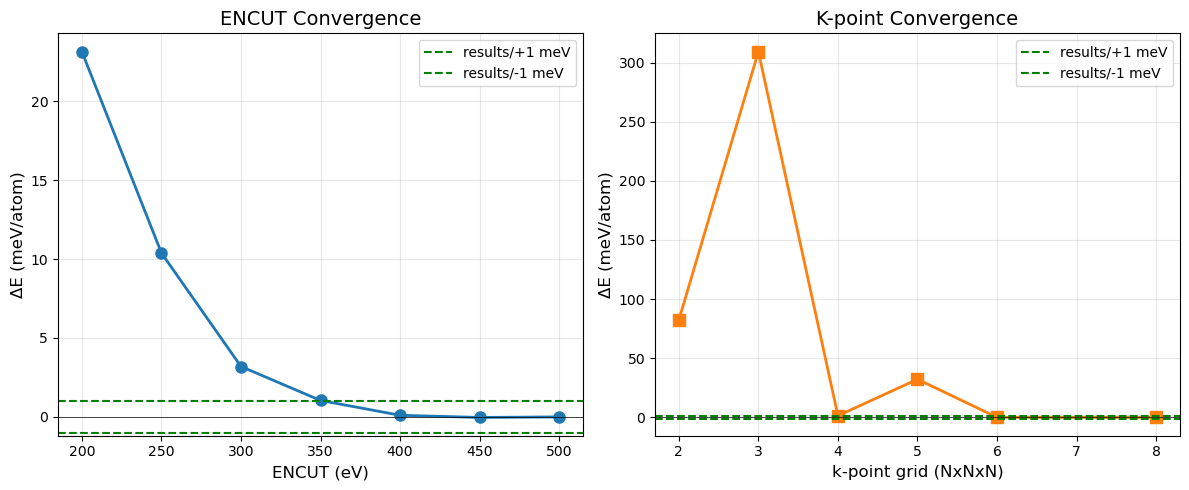

In [5]:
if HAS_MATPLOTLIB:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ENCUT convergence plot
    ax1.plot(encut_values, encut_diff, 'o-', markersize=8, linewidth=2)
    ax1.axhline(y=1, color='g', linestyle='--', label='results/+1 meV')
    ax1.axhline(y=-1, color='g', linestyle='--', label='results/-1 meV')
    ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax1.set_xlabel('ENCUT (eV)', fontsize=12)
    ax1.set_ylabel('ΔE (meV/atom)', fontsize=12)
    ax1.set_title('ENCUT Convergence', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # K-point convergence plot
    ax2.plot(kpt_values, kpt_diff, 's-', markersize=8, linewidth=2, color='C1')
    ax2.axhline(y=1, color='g', linestyle='--', label='results/+1 meV')
    ax2.axhline(y=-1, color='g', linestyle='--', label='results/-1 meV')
    ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax2.set_xlabel('k-point grid (NxNxN)', fontsize=12)
    ax2.set_ylabel('ΔE (meV/atom)', fontsize=12)
    ax2.set_title('K-point Convergence', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.savefig('convergence_plots.png', dpi=150)
    print()
    print("Saved plot: convergence_plots.png")

print()
print("=" * 60)
print("Convergence testing complete!")
print("=" * 60)
print()
print("Key takeaways:")
print("1. Always test convergence before production runs")
print("2. Use the smallest converged values for efficiency")
print("3. Re-test when changing systems significantly")
print()
print("Next: Try 03_relaxation/ to learn about structure optimization.")
